In [11]:
import os
import glob
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
import rioxarray as rxr
import numpy as np
from skimage import exposure
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import adjust_band
import geopandas as gpd
import xarray as xr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
print('packages loaded')

packages loaded


In [39]:
# SET DIRECTORIES

dirImgLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_*[B02-B04].jp2'
#print(os.listdir(dirImgLoc))

stack_band_paths = glob(dirImgLoc)
stack_band_paths.sort()
print(stack_band_paths)
# Shapefile directory
dirPolyLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/shapefiles/'


#Output directory
out = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/'

['/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B02.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B03.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B04.jp2']


In [62]:
arr_st, meta = es.stack(stack_band_paths, nodata = -9999)

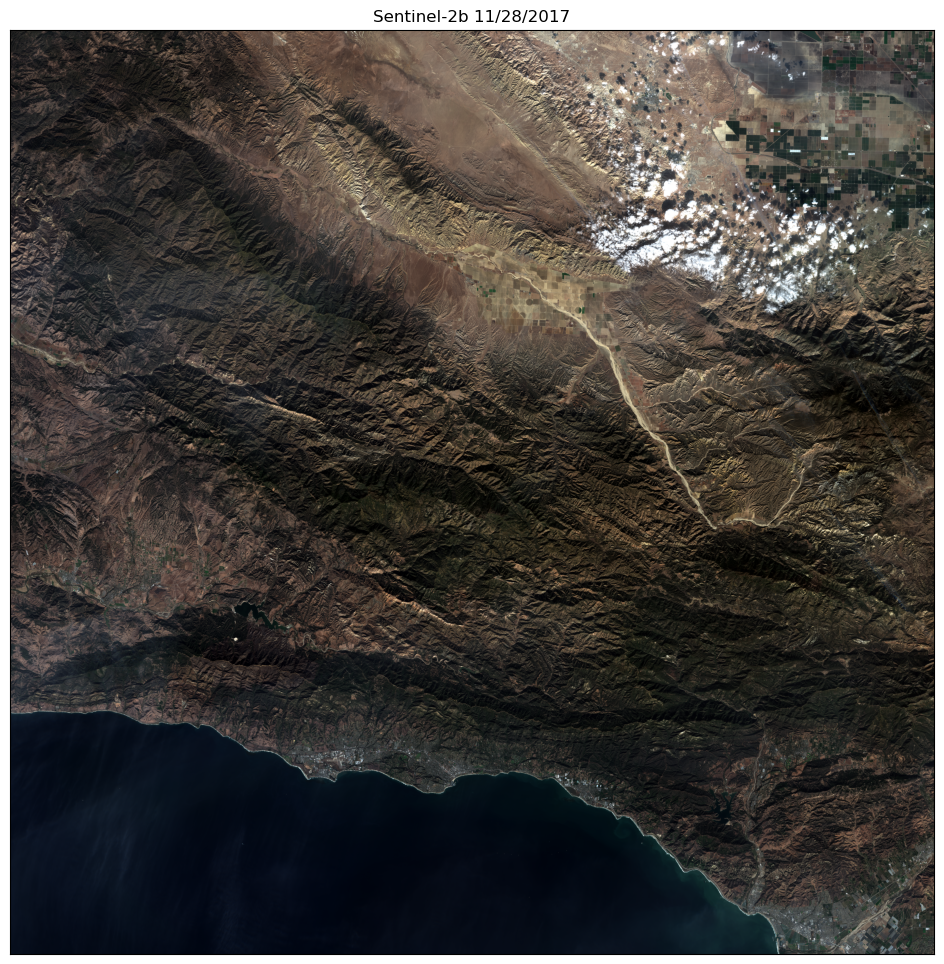

In [63]:
fig, ax = plt.subplots(figsize=(12,12))

ep.plot_rgb(
    arr_st, 
    rgb=(2,1,0), 
    ax=ax,
    stretch=True,
    str_clip=0.5,
    title='Sentinel-2b 11/28/2017')
plt.show()

#fig.savefig(out + 'pre-fire', dpi = 'figure', format='png', metadata=meta, bbox_inches = 'tight')


[[ 413.  464.  578. ...  492.  493.  497.]
 [ 461.  560.  582. ...  455.  500.  501.]
 [ 556.  534.  521. ...  443.  463.  491.]
 ...
 [ 411.  551.  448. ...  586.  579.  979.]
 [ 665.  479.  819. ...  706.  725. 1052.]
 [ 574.  573.  677. ...  582.  935.  962.]]


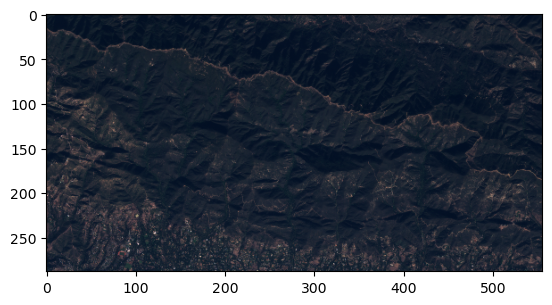

In [76]:
src = rio.open('/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/s2_final_clip.tif')

red = src.read(3)
print(red)
green = src.read(2)
blue = src.read(1)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)



# Create RGB natural color composite
rgb1 = np.dstack((red, green, blue))
rgb = adjust_band(rgb1)
#print(rgb)


# shape =gpd.read_file(dirPolyLoc)

# rgb_clip = rgb.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)

plt.imshow(rgb)
    #clip_stats = np.mean(dnbr_clip)
        #print(clip_stats)
# show(image_norm, transform=src.transform)
# rio.plot.show(image_norm, transform=src.transform, adjust=True)

(59, 27, 3)
(1, 59, 27)
(59, 27, 3)
20303


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(247, 129, 3)
(1, 247, 129)
(247, 129, 3)
19512


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(63, 51, 3)
(1, 63, 51)
(63, 51, 3)
17987


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(93, 66, 3)
(1, 93, 66)
(93, 66, 3)
20384


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(125, 69, 3)
(1, 125, 69)
(125, 69, 3)
20734


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(271, 244, 3)
(1, 271, 244)
(271, 244, 3)
19165


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(104, 58, 3)
(1, 104, 58)
(104, 58, 3)
21224


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(264, 93, 3)
(1, 264, 93)
(264, 93, 3)
20650


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(66, 69, 3)
(1, 66, 69)
(66, 69, 3)
19777


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(93, 29, 3)
(1, 93, 29)
(93, 29, 3)
20499


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(54, 16, 3)
(1, 54, 16)
(54, 16, 3)
20029


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(57, 23, 3)
(1, 57, 23)
(57, 23, 3)
12860


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(38, 19, 3)
(1, 38, 19)
(38, 19, 3)
20253


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(76, 31, 3)
(1, 76, 31)
(76, 31, 3)
20254


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(59, 33, 3)
(1, 59, 33)
(59, 33, 3)
21009


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(71, 33, 3)
(1, 71, 33)
(71, 33, 3)
19629


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(143, 84, 3)
(1, 143, 84)
(143, 84, 3)
12527


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(42, 18, 3)
(1, 42, 18)
(42, 18, 3)
20031


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(42, 61, 3)
(1, 42, 61)
(42, 61, 3)
19381


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(64, 81, 3)
(1, 64, 81)
(64, 81, 3)
12057


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(59, 22, 3)
(1, 59, 22)
(59, 22, 3)
21513


/tmp/ipykernel_14308/1768956081.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(107, 48, 3)
(1, 107, 48)
(107, 48, 3)
12524


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(45, 42, 3)
(1, 45, 42)
(45, 42, 3)
19167


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(51, 23, 3)
(1, 51, 23)
(51, 23, 3)
19450


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(38, 24, 3)
(1, 38, 24)
(38, 24, 3)
21083


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(49, 51, 3)
(1, 49, 51)
(49, 51, 3)
20386


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(98, 70, 3)
(1, 98, 70)
(98, 70, 3)
12518


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(223, 125, 3)
(1, 223, 125)
(223, 125, 3)
22075


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(91, 102, 3)
(1, 91, 102)
(91, 102, 3)
12042


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(57, 33, 3)
(1, 57, 33)
(57, 33, 3)
20729


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(125, 58, 3)
(1, 125, 58)
(125, 58, 3)
19510


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(70, 31, 3)
(1, 70, 31)
(70, 31, 3)
19632


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(95, 55, 3)
(1, 95, 55)
(95, 55, 3)
21078


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(192, 136, 3)
(1, 192, 136)
(192, 136, 3)
19649


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(343, 232, 3)
(1, 343, 232)
(343, 232, 3)
17346


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(34, 31, 3)
(1, 34, 31)
(34, 31, 3)
19647


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(88, 45, 3)
(1, 88, 45)
(88, 45, 3)
20308


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(125, 68, 3)
(1, 125, 68)
(125, 68, 3)
19451


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(100, 31, 3)
(1, 100, 31)
(100, 31, 3)
20504


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(387, 355, 3)
(1, 387, 355)
(387, 355, 3)
19384


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(58, 23, 3)
(1, 58, 23)
(58, 23, 3)
21634


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(330, 175, 3)
(1, 330, 175)
(330, 175, 3)
17347


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(99, 35, 3)
(1, 99, 35)
(99, 35, 3)
22668


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(57, 18, 3)
(1, 57, 18)
(57, 18, 3)
12997


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(53, 108, 3)
(1, 53, 108)
(53, 108, 3)
13281


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(97, 141, 3)
(1, 97, 141)
(97, 141, 3)
12616


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(128, 88, 3)
(1, 128, 88)
(128, 88, 3)
21500


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


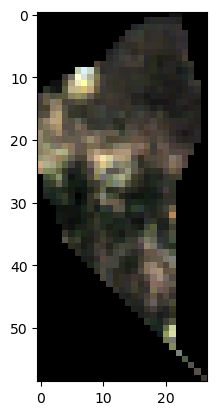

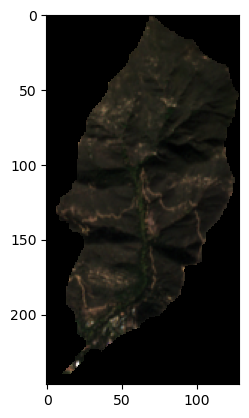

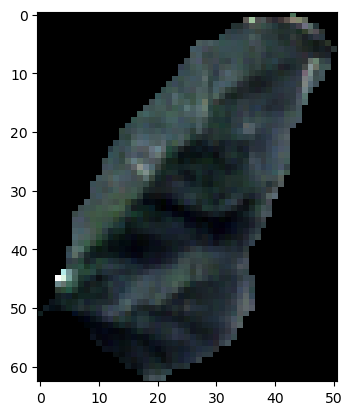

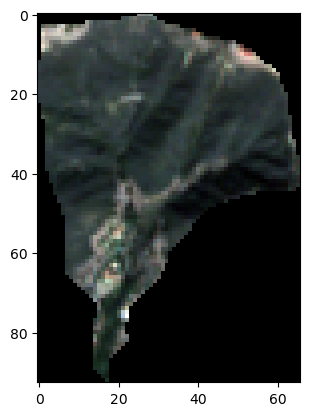

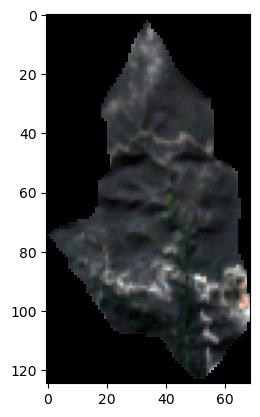

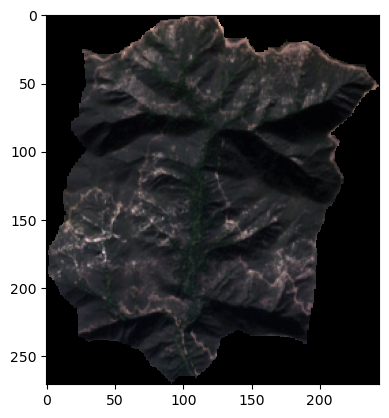

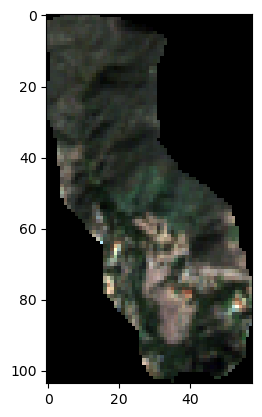

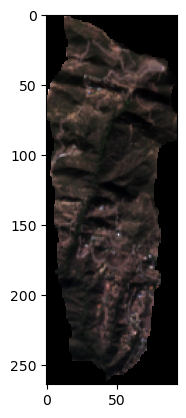

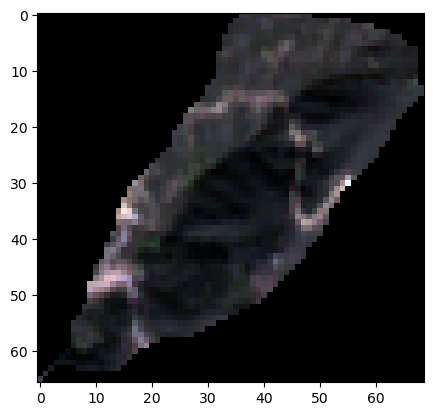

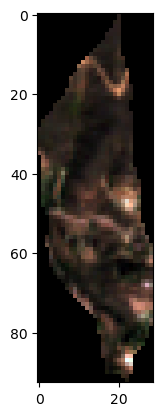

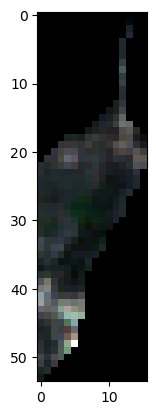

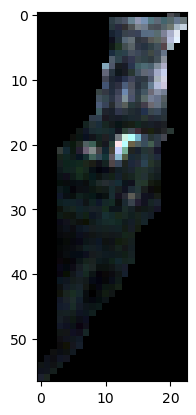

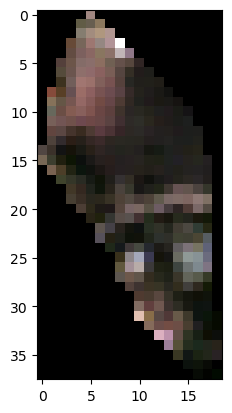

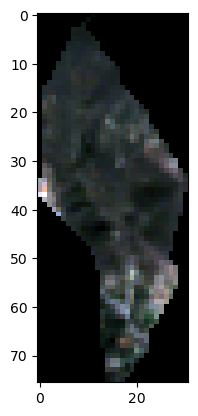

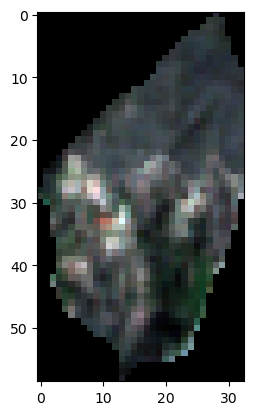

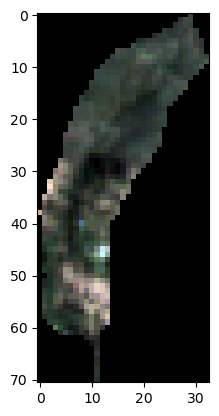

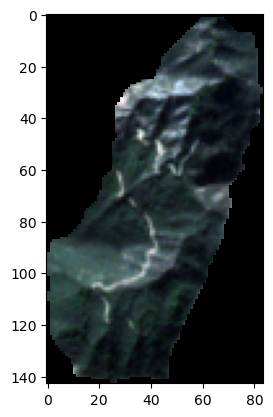

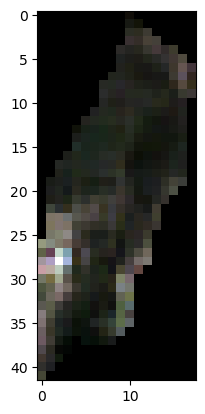

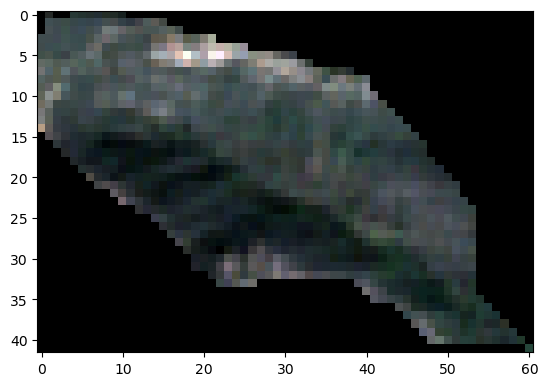

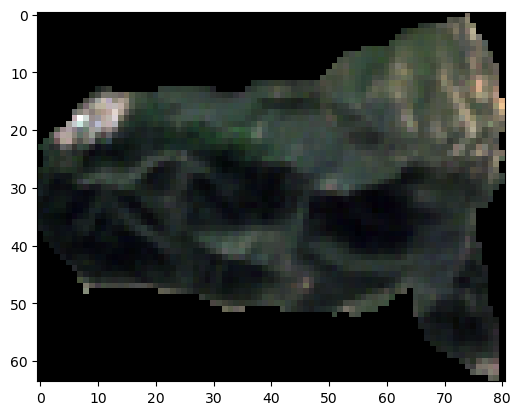

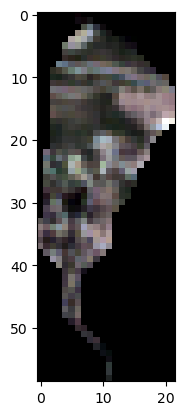

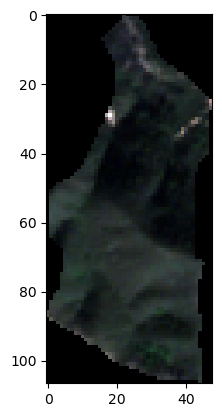

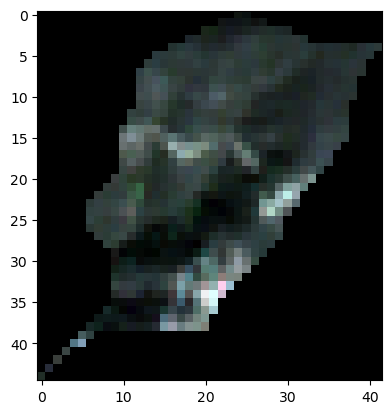

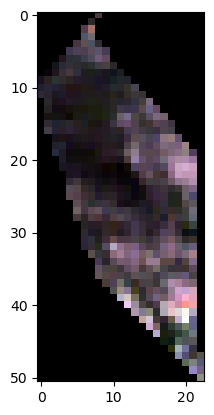

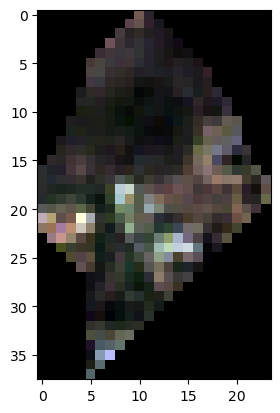

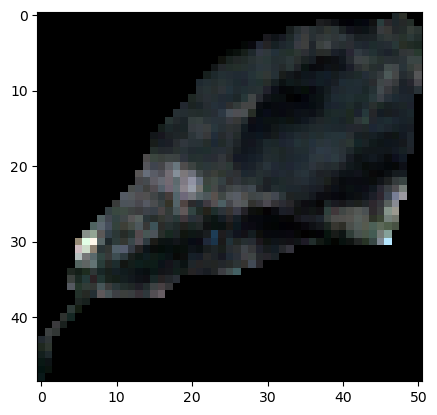

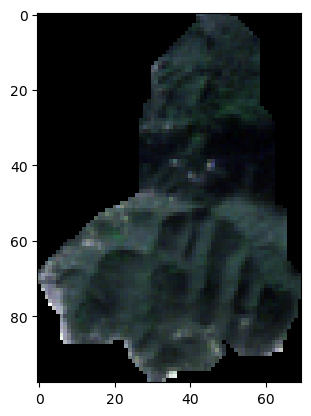

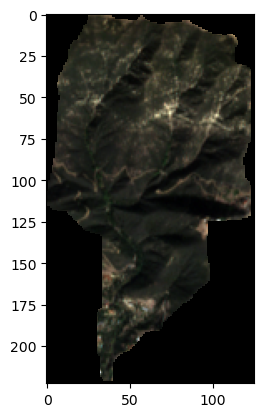

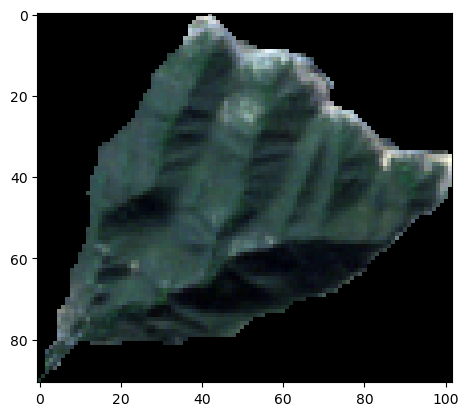

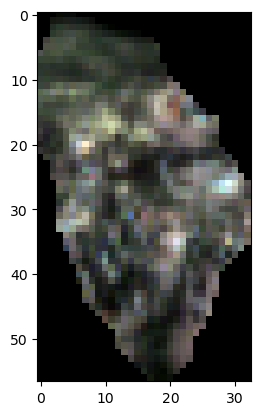

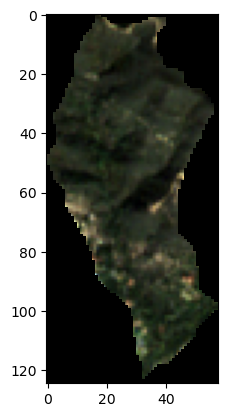

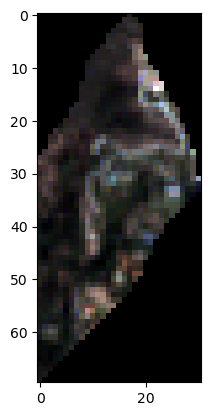

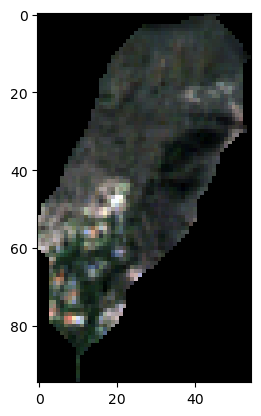

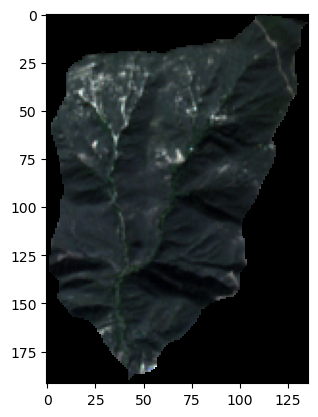

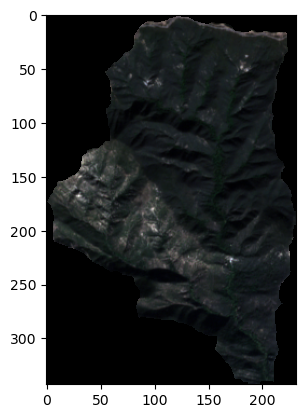

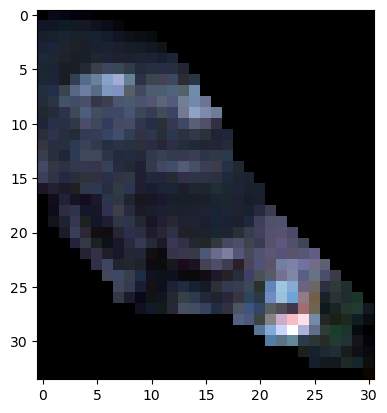

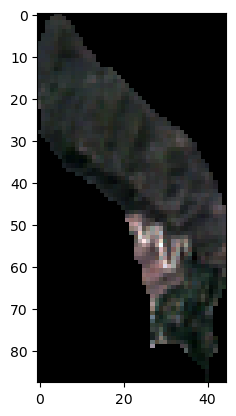

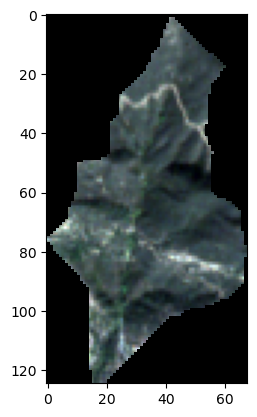

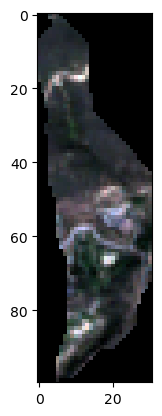

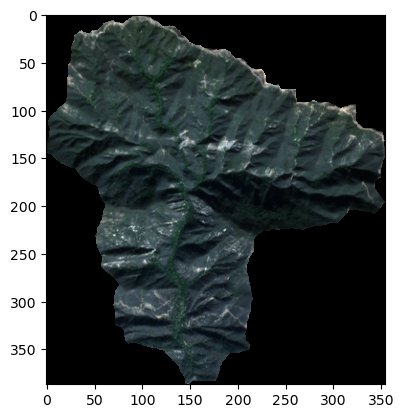

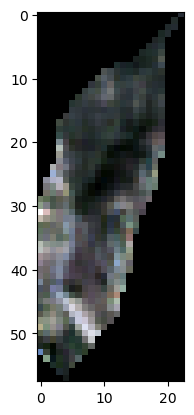

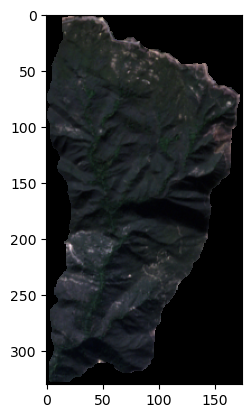

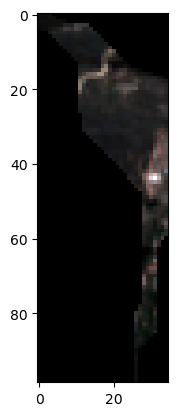

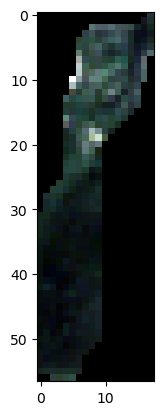

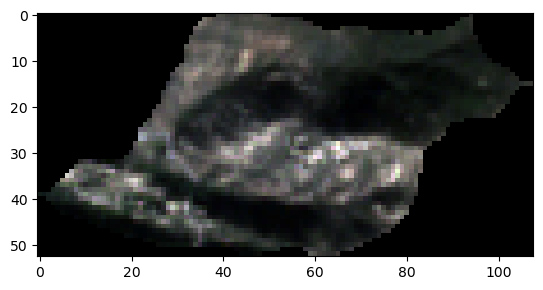

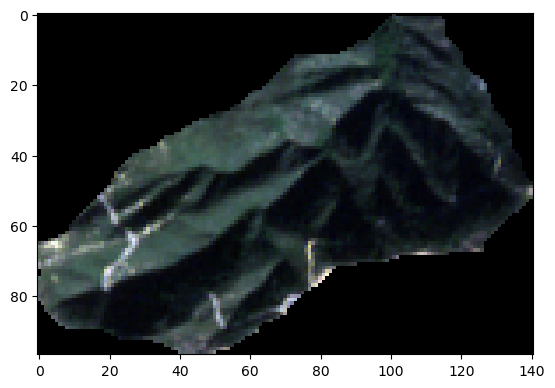

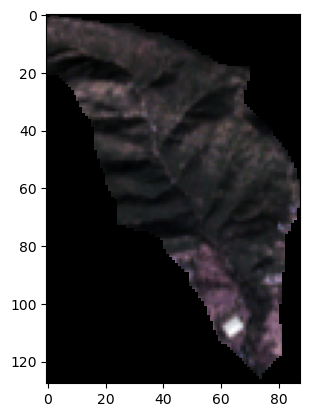

In [51]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

blue = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B02.jp2'
red = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B04.jp2'
green = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B03.jp2'

imageRed = rxr.open_rasterio(red, masked=True)
imageBlue = rxr.open_rasterio(blue, masked=True)
imageGreen = rxr.open_rasterio(green, masked=True)

for filename in os.listdir(dirPolyLoc):
    if filename.endswith('.shp'):
        shape = gpd.read_file(os.path.join(dirPolyLoc, filename))
        
        redClip = imageRed.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
        blueClip = imageBlue.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
        greenClip = imageGreen.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)

        redn = normalize(redClip)
        bluen = normalize(blueClip)
        greenn = normalize(greenClip)
        
        
        redData = redn.data[0,:,:]
        blueData = bluen.data[0,:,:]
        greenData = greenn.data[0,:,:]
        
        dataPlot = np.zeros((redData.shape[0],redData.shape[1],3))
        dataPlot[:,:,0] = redData
        dataPlot[:,:,1] = greenData
        dataPlot[:,:,2] = blueData
        dataPlotMask = np.ma.masked_where(np.isnan(dataPlot), dataPlot)
        
        #print(dataPlotMask.shape)
        #print(redn.shape)
        #print(dataPlot.shape)
        
        
        
        b_name = filename.split('.')
        name = b_name[0]
        print(name)
        plt.figure()
        plt.imshow(dataPlotMask)
        plt.imsave(os.path.join(out, name + '_rgb.png'), dataPlotMask)
#         plt.show()
        
#         rgbarr = xr.Dataset()
#         rgbarr['data'] = xr.DataArray(dataPlotMask, dims=('band','y','x'),
#                                       coords={'band': image.coords['band'],
#                                               'x': image.coords['x'],
#                                               'y': image.coords['y']})
        

In [40]:
# blue = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B02.jp2'
# red = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B04.jp2'
# green = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B03.jp2'


# imageRed = rxr.open_rasterio(red, masked=True)
# imageBlue = rxr.open_rasterio(blue, masked=True)
# imageGreen = rxr.open_rasterio(green, masked=True)
# #print('here after load')
# print((imageRed.data).dtype)
# # print(imageRed.data)
# # print(imageBlue.data)
# # print(imageGreen.data)
# shape = gpd.read_file(dirPolyLoc)

# # Clip
# redClip = imageRed.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
# #redClip.plot()
# blueClip = imageBlue.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
# greenClip = imageGreen.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)

# def normalize(array):
#     """Normalizes numpy arrays into scale 0.0 - 1.0"""
#     array_min, array_max = array.min(), array.max()
#     return ((array - array_min)/(array_max - array_min))
# redn = normalize(redClip)
# bluen = normalize(blueClip)
# greenn = normalize(greenClip)
# print(redn)

# redData = redn.data[0,:,:]
# #print(redData)
# blueData = bluen.data[0,:,:]
# greenData = greenn.data[0,:,:]

# #print('here after divide')

# dataPlot = np.zeros((redData.shape[0],redData.shape[1],3))

# dataPlot[:,:,0] = redData
# dataPlot[:,:,1] = greenData
# dataPlot[:,:,2] = blueData
# #print('here after assigning')



# dataPlotMask = np.ma.masked_where(np.isnan(dataPlot), dataPlot) #np.isnan(dataPlot)



# # blueData
# # redData
# # greenData

# # plt.figure()
# # plt.imshow(dataPlotMask)
# # n = '19384_rgb.png'
# # plt.imsave(n, dataPlotMask)
# # plt.show()

float32
<xarray.DataArray (band: 1, y: 59, x: 27)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.34217334,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
         0.34605435,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan, 0.2542044 ]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.575e+05 2.575e+05 ... 2.577e+05 2.577e+05
  * y            (y) float64 3.816e+06 3.816e+06 ... 3.815e+06 3.815e+06
    spatial_ref  int64 0
